In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from scipy import stats

In [15]:
titanic_dataframe = pd.read_csv(r"C:\Users\Yadnesh\Downloads\titanic_data.csv")
print(titanic_dataframe)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [16]:
titanic_dataframe.shape

(891, 12)

In [17]:
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
def missing_val(data):
    data_null = pd.isnull(data)
    data_null_true = data[data_null == True]
    missing_val = len(data_null_true)
    return missing_val
titanic_dataframe.apply(missing_val)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
titanic_dataframe.groupby('Sex')[['Age','Fare','Parch','SibSp']].describe()

Age                                                               Fare                                                                        Parch                                                       SibSp                                                     
        count           mean            std   min   25%   50%   75%   max  count           mean            std   min        25%   50%    75%       max  count          mean           std  min  25%  50%  75%  max  count          mean           std  min  25%  50%  75%  max
Sex                                                                                                                                                                                                                                                                           
female  261.0  27.9157088123  14.1101464575  0.75  18.0  27.0  37.0  63.0  314.0  44.4798178344  57.9976976231  6.75  12.071875  23.0  55.00  512.3292  314.0  0.6496815287  1.0228460078  0.0  0.0  0.0  1.0  6.0  314.0  0.6942675159  1.1565201765  0.0  0.0  0.0  1.0  8.0
male    453.0  30.7266445916  14.6782008238  0.42  21.0  29.0  39.0  80.0  577.0  25.5238934142  43.1382626234  0.00   7.895800  10.5  26.55  512.3292  577.0  0.2357019064  0.6122938155  0.0  0.0  0.0  0.0  5.0  577.0  0.4298093588  1.0618112793  0.0  0.0  0.0  0.0  8.0

In [54]:
titanic_dataframe['Age'].describe()

count    714.0000000000
mean      29.6991176471
std       14.5264973323
min        0.4200000000
25%       20.1250000000
50%       28.0000000000
75%       38.0000000000
max       80.0000000000
Name: Age, dtype: float64

Text(0,0.5,'Count')

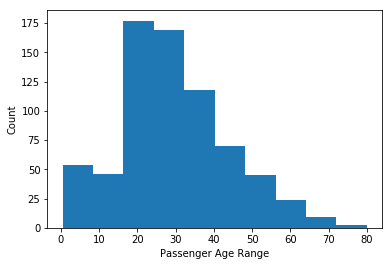

In [55]:
%matplotlib inline
plt.hist(titanic_dataframe['Age'].dropna())
plt.xlabel("Passenger Age Range")
plt.ylabel("Count")

Text(0,0.5,'Count')

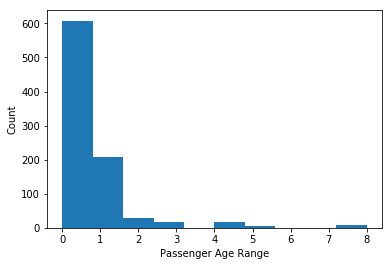

In [58]:
%matplotlib inline
plt.hist(titanic_dataframe['SibSp'].dropna())
plt.xlabel("Passenger Age Range")
plt.ylabel("Count")

Text(0,0.5,'Passenger Count')

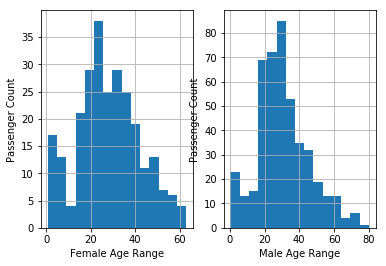

In [71]:
fig = plt.figure()
fig1 = fig.add_subplot(121)
plt.xlabel("Female Age Range")
plt.ylabel("Passenger Count")
titanic_dataframe[titanic_dataframe['Sex']=="female"]['Age'].hist(bins=15)
fig2 = fig.add_subplot(122)
titanic_dataframe[titanic_dataframe['Sex']=="male"]['Age'].hist(bins=15)
plt.xlabel("Male Age Range")
plt.ylabel("Passenger Count")

C:\Users\Yadnesh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'Age Range')

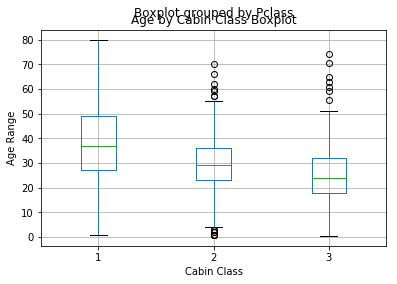

In [72]:
titanic_dataframe.boxplot(column=["Age"],by=["Pclass"])
plt.title("Age by Cabin Class Boxplot")
plt.xlabel("Cabin Class")
plt.ylabel("Age Range")

In [73]:
titanic_dataframe.groupby('Pclass')['Age'].mean()

Pclass
1    38.2334408602
2    29.8776300578
3    25.1406197183
Name: Age, dtype: float64

C:\Users\Yadnesh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'age range')

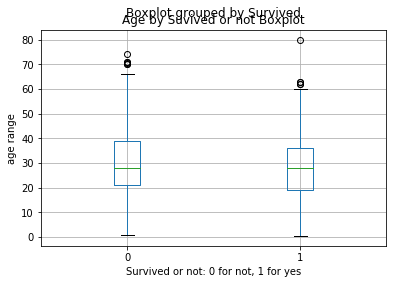

In [74]:
titanic_dataframe.boxplot(column=["Age"],by=["Survived"])
plt.title("Age by Suvived or not Boxplot")
plt.xlabel("Survived or not: 0 for not, 1 for yes")
plt.ylabel("age range")

In [77]:
def age_group(age):
    if age < 18:
        return "underage" 
    if 18 <= age < 60:
        return "adult_mid_age"
    if age >= 60:
        return "senior"  
titanic_dataframe["age_group"] = titanic_dataframe["Age"].apply(age_group)

In [76]:
titanic_dataframe.groupby(["age_group"])["Survived"].mean()

age_group
adult_mid_age    0.3860869565
senior           0.2692307692
underage         0.5398230088
Name: Survived, dtype: float64

In [78]:
titanic_dataframe.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [79]:
titanic_dataframe.groupby('Pclass')['Survived'].mean()

Pclass
1    0.6296296296
2    0.4728260870
3    0.2423625255
Name: Survived, dtype: float64

In [80]:
titanic_dataframe.groupby('Sex')['Survived'].mean()

Sex
female    0.7420382166
male      0.1889081456
Name: Survived, dtype: float64

In [82]:
female_count = len(titanic_dataframe[titanic_dataframe['Sex']=='female'])
print(female_count)

314


In [83]:
male_count = len(titanic_dataframe[titanic_dataframe['Sex']=='male'])
print(male_count)

577


In [85]:
survived_sum_table = titanic_dataframe.groupby(['Pclass','Sex'])['Survived'].sum()  # The number of passengers survived by Pclass and Sex
print(survived_sum_table)

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64


In [86]:
survived_rate_table = titanic_dataframe.groupby(['Pclass','Sex'])['Survived'].mean()  # The number of passengers survived by Pclass and Sex
print(survived_rate_table)

Pclass  Sex   
1       female    0.9680851064
        male      0.3688524590
2       female    0.9210526316
        male      0.1574074074
3       female    0.5000000000
        male      0.1354466859
Name: Survived, dtype: float64


In [87]:
titanic_dataframe.groupby(["Pclass","age_group"])["Survived"].mean()

Pclass  age_group    
1       adult_mid_age    0.6751592357
        senior           0.2941176471
        underage         0.9166666667
2       adult_mid_age    0.4178082192
        senior           0.2500000000
        underage         0.9130434783
3       adult_mid_age    0.2022058824
        senior           0.2000000000
        underage         0.3717948718
Name: Survived, dtype: float64

In [89]:
from scipy.stats import chi2_contingency

In [90]:
titanic_dataframe.groupby(['Survived','Pclass'])['Pclass'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64

In [91]:
obs = np.array([[80,97,372],[136,87,119]])

In [92]:
chi2_contingency(obs)

(102.88898875696056,
 4.5492517112987927e-23,
 2,
 array([[ 133.09090909,  113.37373737,  302.53535354],
        [  82.90909091,   70.62626263,  188.46464646]]))

In [93]:
titanic_dataframe.groupby(['Survived','age_group'])['age_group'].count()

Survived  age_group    
0         adult_mid_age    353
          senior            19
          underage          52
1         adult_mid_age    222
          senior             7
          underage          61
Name: age_group, dtype: int64

In [94]:
obs_age = np.array([[353,19,52],[222,7,61]])

In [95]:
chi2_contingency(obs_age)

(11.351868442642676,
 0.0034274654688191105,
 2,
 array([[ 341.45658263,   15.43977591,   67.10364146],
        [ 233.54341737,   10.56022409,   45.89635854]]))